# Dataset Content Description
The dataset includes credit card transactions performed in September 2013 by European cardholders.
This dataset shows transactions that took place over the course of two days, out of which there were 492 frauds out of 284,807 transactions. The dataset is quite uneven; frauds, which are in the positive category, represent 0.172% of all transactions.


The dataset contains only numeric input variables that have undergone PCA transformation. Unfortunately, we are unable to offer the original characteristics and further context for the data due to confidentiality concerns. The major components derived with PCA are features V1, V2,..., V28. The only features that have not been changed with PCA are "Time" and "Amount." The seconds that passed between each transaction and the dataset's initial transaction are listed in the feature "Time." The transaction amount is represented by the feature "Amount," which may be utilized for example-dependent, cost-sensitive learning. The response variable, feature "Class," has a value of 1 in cases of fraud and 0 in all other cases.

# Machine Learning Method

### Unsupervised Machine Learning 

## This project utilizes Logistic Regression for Classification

The logistic regression uses a logistic function called a sigmoid function to map predictions and their probabilities.

The Sigmoid function refers to a S-shaped curve that converts any real value to a range between 0 and 1.

## IMPORTING LIBRARIES

In [505]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [506]:
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASET

In [507]:
creditcard_df = pd.read_csv('/Users/mac/Downloads/creditcard.csv')

In [508]:
creditcard_df.shape

(284807, 31)

In [509]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [510]:
creditcard_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [511]:
creditcard_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [512]:
creditcard_df.tail(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284792,172774.0,-0.724123,1.485216,-1.132218,-0.607190,0.709499,-0.482638,0.548393,0.343003,-0.226323,...,0.414621,1.307511,-0.059545,0.242669,-0.665424,-0.269869,-0.170579,-0.030692,3.99,0
284793,172775.0,1.971002,-0.699067,-1.697541,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,...,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [513]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [514]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## EXPLORING & VISUALIZING THE DATASET

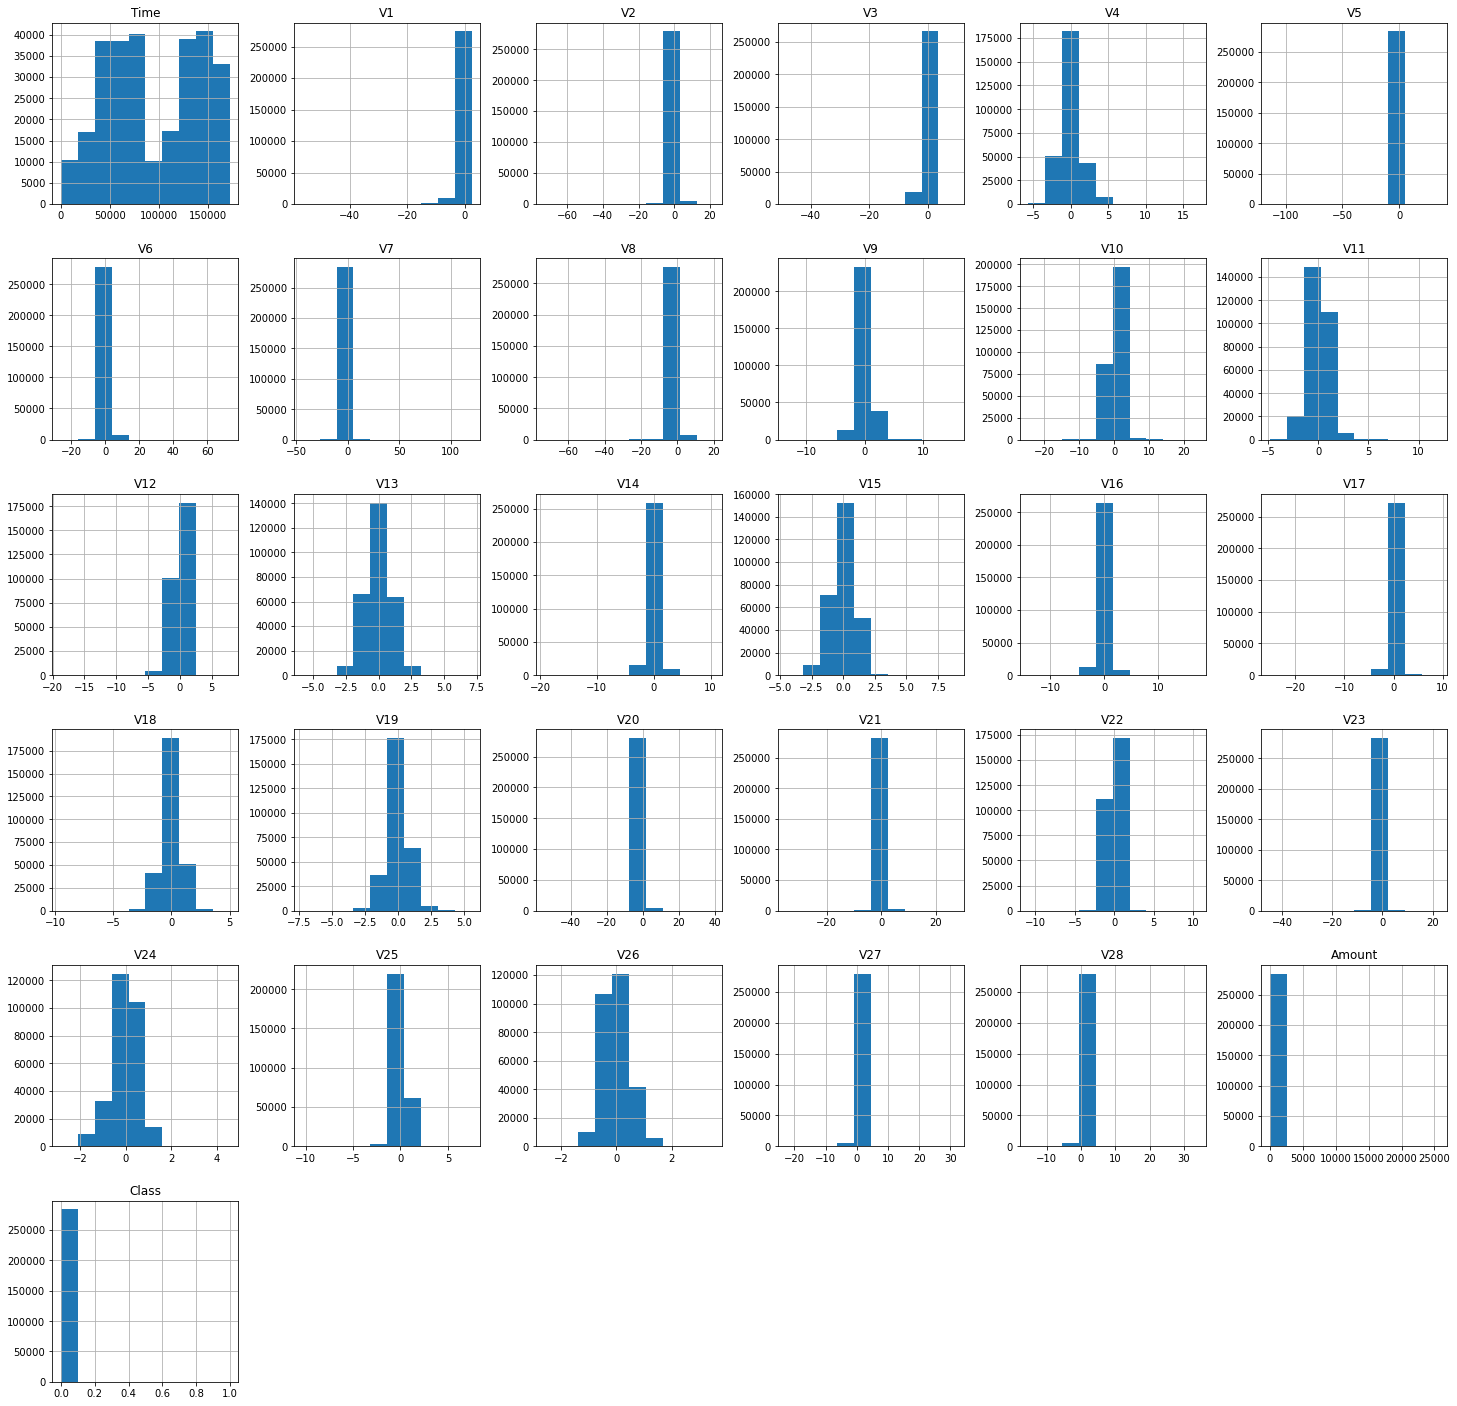

In [568]:
creditcard_df.hist(figsize = (25,25))
plt.show()

In [515]:
# Count the number of fraudulent and genuine credit card
fraudulent = creditcard_df[creditcard_df['Class'] == 1]
fraudulent

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [516]:
genuine = creditcard_df[creditcard_df['Class'] == 0]
genuine

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [517]:
print("Number of fraudulent credit cards =", len(fraudulent))
print("Number of genuine credit cards =", len(genuine))

Number of fraudulent credit cards = 492
Number of genuine credit cards = 284315


In [518]:
print("Total transaction =", len(creditcard_df))
print(f"Percentage of fraudulent = {round(len(fraudulent) / len(creditcard_df) * 100, 3)}%")
print(f"Percentage of genuine credit cards = {round(len(genuine) / len(creditcard_df) * 100, 3)}%")

Total transaction = 284807
Percentage of fraudulent = 0.173%
Percentage of genuine credit cards = 99.827%


### Fraudulent credit cards based on their amount (Transaction Amount)

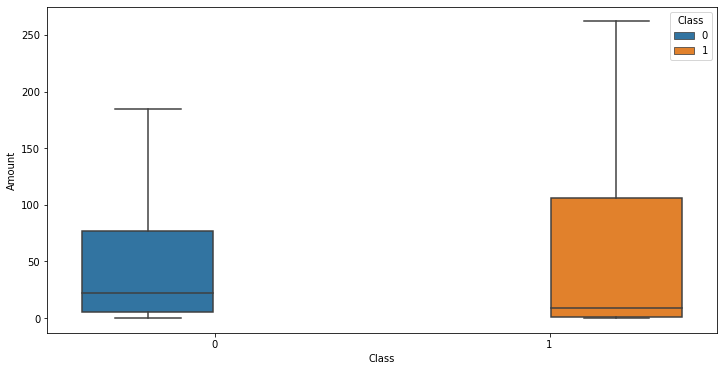

In [579]:
# Plot a Bar Chart to show the number of fraudulent credit cards based on their amount

plt.subplots(figsize=(12,6))
s = sns.boxplot(x="Class", y="Amount", hue="Class",data=creditcard_df, showfliers=False)
plt.show();

### Fraudulent credit cards based on their time (Time of Transaction)

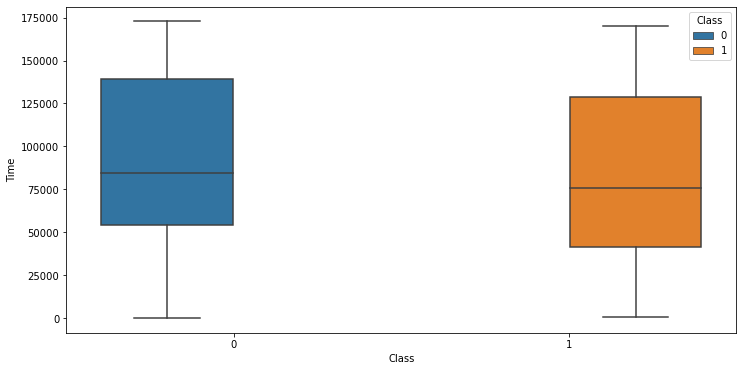

In [580]:
# Plot a Bar Chart to show the number of fraudulent credit cards based on their time

plt.subplots(figsize=(12,6))
s = sns.boxplot(x="Class", y="Time", hue="Class",data=creditcard_df, showfliers=False)
plt.show();

## PREPARING THE DATASET FOR TRAINING / DATA CLEANING

<AxesSubplot:>

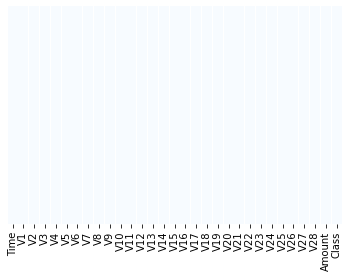

In [521]:
#Explore which dataset is missing 
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar= False, cmap='Blues')

In [522]:
# plt.figure(figsize=(15,10)) 
# sns.boxplot(x='Amount', y='Class', data=creditcard_df) 

In [523]:
# Let's drop the target column to display the data in order to balance inbalanced occurances and proceed to training the data
X = creditcard_df.drop('Class', axis=1)
Y = creditcard_df['Class']

In [524]:
from collections import Counter
def plot_points(X, Y):
    count_y = Counter(Y)
    for label, _ in count_y.items():
        row_ix = np.where(Y == label)[0]
        plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label = str(label))
    
    plt.legend()
    plt.show()

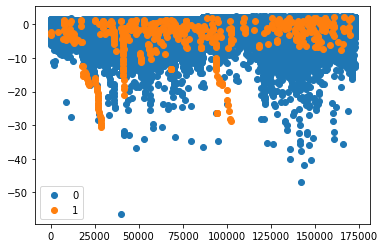

In [525]:
plot_points(X, Y)

### It is evident that the variable 'Class' has imbalanced occurences of both outputs (0 and 1). It is important to balance them before training the data. 
#### I will apply both undersample and oversample imbalance adjustment techniques.

In [526]:
import imblearn # importing imbalanced-learn to balance the dataset

In [527]:
# RANDOM UNDERSAMPLING

undersampled_d = imblearn.under_sampling.RandomUnderSampler(random_state = 0)
X_us, Y_us = undersampled_d.fit_resample(X,Y)

In [528]:
Y_us.value_counts()

0    492
1    492
Name: Class, dtype: int64

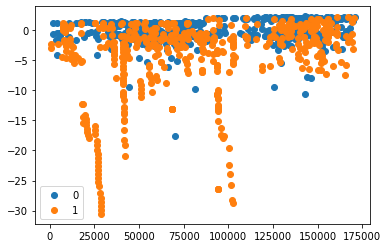

In [529]:
# Redisplay the data

plot_points(X_us, Y_us)

In [530]:
# RANDOM OVERSAMPLING

X = creditcard_df.drop('Class', axis=1)
Y = creditcard_df['Class']

oversampled_d = imblearn.over_sampling.RandomOverSampler(random_state = 0)
X_os, Y_os = oversampled_d.fit_resample(X,Y)

In [531]:
Y_os.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

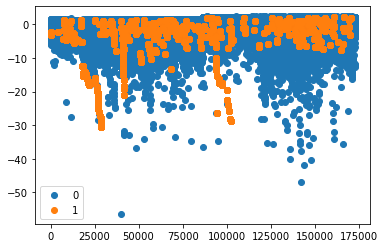

In [532]:
# Redisplay the data

plot_points(X_os, Y_os)

### It can be now observe that the class 'Class' has a balance values (0 and 1)

## TRAINING THE MODEL 

In [533]:
from sklearn.model_selection import train_test_split

In [534]:
threshold = 0.5

In [535]:
X_us_train, X_us_test, Y_us_train, Y_us_test = train_test_split(X_us, Y_us, test_size = threshold, random_state = 0)

X_os_train, X_os_test, Y_os_train, Y_os_test = train_test_split(X_os, Y_os, test_size = threshold, random_state = 0)

In [536]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression as LogReg

In [537]:
classifier = LogReg(random_state = 0)

In [538]:
classifier.fit(X_us_train, Y_us_train)

LogisticRegression(random_state=0)

In [539]:
classifier.fit(X_os_train, Y_os_train)

LogisticRegression(random_state=0)

In [540]:
y_predict_test_undersampled = classifier.predict(X_us_test)
y_predict_test_oversampled = classifier.predict(X_os_test)

In [541]:
y_predict_test_undersampled

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,

In [542]:
Y_us_test.values

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,

In [543]:
y_predict_test_oversampled

array([1, 1, 1, ..., 1, 0, 0])

In [565]:
Y_os_test.values

array([1, 1, 1, ..., 1, 0, 0])

In [544]:
# the probability that the credit card is fraudulent and 
# the probability that the credit card is genuene
classifier.predict_proba(X_us_test)

array([[8.69971846e-01, 1.30028154e-01],
       [6.19060359e-12, 1.00000000e+00],
       [9.28043552e-01, 7.19564484e-02],
       [0.00000000e+00, 1.00000000e+00],
       [5.98451146e-04, 9.99401549e-01],
       [6.00954327e-01, 3.99045673e-01],
       [9.98851775e-01, 1.14822451e-03],
       [3.96176381e-07, 9.99999604e-01],
       [1.23614452e-11, 1.00000000e+00],
       [6.85413948e-11, 1.00000000e+00],
       [7.54017227e-01, 2.45982773e-01],
       [3.90277810e-09, 9.99999996e-01],
       [9.82246930e-01, 1.77530699e-02],
       [6.99831460e-01, 3.00168540e-01],
       [1.36612277e-03, 9.98633877e-01],
       [8.36365202e-01, 1.63634798e-01],
       [8.48556422e-07, 9.99999151e-01],
       [3.66894670e-05, 9.99963311e-01],
       [8.46943752e-01, 1.53056248e-01],
       [9.80727168e-01, 1.92728317e-02],
       [9.64305732e-01, 3.56942677e-02],
       [4.97379915e-14, 1.00000000e+00],
       [9.93874471e-01, 6.12552877e-03],
       [1.67257530e-02, 9.83274247e-01],
       [9.617138

In [545]:
classifier.predict_proba(X_us_test)[:,1]

array([1.30028154e-01, 1.00000000e+00, 7.19564484e-02, 1.00000000e+00,
       9.99401549e-01, 3.99045673e-01, 1.14822451e-03, 9.99999604e-01,
       1.00000000e+00, 1.00000000e+00, 2.45982773e-01, 9.99999996e-01,
       1.77530699e-02, 3.00168540e-01, 9.98633877e-01, 1.63634798e-01,
       9.99999151e-01, 9.99963311e-01, 1.53056248e-01, 1.92728317e-02,
       3.56942677e-02, 1.00000000e+00, 6.12552877e-03, 9.83274247e-01,
       3.82861581e-02, 2.38229962e-01, 4.13419162e-01, 1.09638440e-01,
       9.99998673e-01, 1.00000000e+00, 5.60438419e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.55903941e-01, 2.39342422e-01,
       3.86379441e-01, 1.44856901e-02, 2.00744369e-01, 3.43966194e-02,
       8.14464032e-02, 9.99999963e-01, 1.00000000e+00, 1.12298006e-02,
       1.00000000e+00, 1.00000000e+00, 5.40030993e-03, 1.26673237e-01,
       2.80370555e-02, 6.01245619e-01, 4.85549810e-01, 8.54974186e-03,
       9.99926646e-01, 1.00000000e+00, 4.81986012e-01, 1.13348394e-01,
      

In [546]:
# Prints True and False of whether the probability passed
# the threshold set (0.5)

classifier.predict_proba(X_us_test)[:,1] > threshold

array([False,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
        True,  True,

In [547]:
# the probability that the credit card is fraudulent and 
# the probability that the credit card is genuene
classifier.predict_proba(X_os_test)

array([[6.92163040e-04, 9.99307837e-01],
       [1.27450898e-06, 9.99998725e-01],
       [1.12931407e-04, 9.99887069e-01],
       ...,
       [4.29214857e-06, 9.99995708e-01],
       [9.70327625e-01, 2.96723752e-02],
       [9.61563628e-01, 3.84363716e-02]])

In [548]:
classifier.predict_proba(X_us_test)[:,1]

array([1.30028154e-01, 1.00000000e+00, 7.19564484e-02, 1.00000000e+00,
       9.99401549e-01, 3.99045673e-01, 1.14822451e-03, 9.99999604e-01,
       1.00000000e+00, 1.00000000e+00, 2.45982773e-01, 9.99999996e-01,
       1.77530699e-02, 3.00168540e-01, 9.98633877e-01, 1.63634798e-01,
       9.99999151e-01, 9.99963311e-01, 1.53056248e-01, 1.92728317e-02,
       3.56942677e-02, 1.00000000e+00, 6.12552877e-03, 9.83274247e-01,
       3.82861581e-02, 2.38229962e-01, 4.13419162e-01, 1.09638440e-01,
       9.99998673e-01, 1.00000000e+00, 5.60438419e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.55903941e-01, 2.39342422e-01,
       3.86379441e-01, 1.44856901e-02, 2.00744369e-01, 3.43966194e-02,
       8.14464032e-02, 9.99999963e-01, 1.00000000e+00, 1.12298006e-02,
       1.00000000e+00, 1.00000000e+00, 5.40030993e-03, 1.26673237e-01,
       2.80370555e-02, 6.01245619e-01, 4.85549810e-01, 8.54974186e-03,
       9.99926646e-01, 1.00000000e+00, 4.81986012e-01, 1.13348394e-01,
      

In [549]:
# Prints True and False of whether the probability passed
# the threshold set (0.5)

classifier.predict_proba(X_us_test)[:,1] > threshold

array([False,  True, False,  True,  True, False, False,  True,  True,
        True, False,  True, False, False,  True, False,  True,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True,  True, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False, False,  True, False,
        True, False, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True, False,  True, False, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True, False,  True, False, False, False,  True, False, False,
        True,  True, False, False,  True,  True, False, False,  True,
        True,  True,

## EVALUATION OF THE MODEL

In [560]:
from sklearn import metrics

In [561]:
cfn_matrix_us = metrics.confusion_matrix(Y_us_test, y_predict_test_undersampled)

cfn_matrix_os = metrics.confusion_matrix(Y_os_test, y_predict_test_oversampled)

In [562]:
matrix_us = metrics.ConfusionMatrixDisplay(confusion_matrix=cfn_matrix_us, display_labels = ['Genuine', 'Fraudulent'])

matrix_os = metrics.ConfusionMatrixDisplay(confusion_matrix=cfn_matrix_os, display_labels = ['Genuine', 'Fraudulent'])

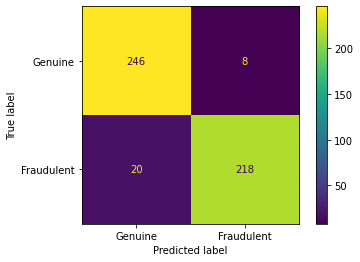

In [563]:
matrix_us.plot()
plt.show()

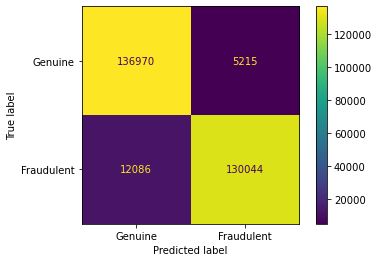

In [564]:
matrix_os.plot()
plt.show()

### FINDING THE ACCURACY OF THE MODEL

### accuracy = correct_predictions / total_predictions

In [550]:
from sklearn.metrics import accuracy_score

In [551]:
# Accuracy
accuracy_un = accuracy_score(Y_us_test, y_predict_test_undersampled)
accuracy_os = accuracy_score(Y_os_test, y_predict_test_oversampled)

print("The Test Accuracy of the undersampled set is", accuracy_un)
print("The Test Accuracy of the oversampled set is", accuracy_os)

The Test Accuracy of the undersampled set is 0.943089430894309
The Test Accuracy of the oversampled set is 0.939148479679229


In [558]:
from sklearn.metrics import  recall_score  

# Recall

recall_score_us = recall_score(Y_us_test, y_predict_test_undersampled, average=None)
recall_score_os = recall_score(Y_os_test, y_predict_test_oversampled, average=None)

print('Recall score for the undersampled set =', recall_score_us)
print('Recall score for the oversampled set =', recall_score_os)

Recall score for the undersampled set = [0.96850394 0.91596639]
Recall score for the oversampled set = [0.96332243 0.91496517]


In [559]:
from sklearn.metrics import precision_score

# Precision

precision_score_us = precision_score(Y_us_test, y_predict_test_undersampled, average=None)
precision_score_os = precision_score(Y_os_test, y_predict_test_oversampled, average=None)

print('Precision score for the undersampled set =', precision_score_us)
print('Precision score for the oversampled set =', precision_score_os)

Precision score for the undersampled set = [0.92481203 0.96460177]
Precision score for the oversampled set = [0.91891638 0.96144434]


In [566]:
from sklearn.metrics import f1_score

f1_score_us = f1_score(Y_us_test, y_predict_test_undersampled, average=None)
f1_score_os = f1_score(Y_os_test, y_predict_test_oversampled, average=None)

print('F1 score for the undersampled set =', f1_score_us)
print('F1 score for the oversampled set =', f1_score_os)

F1 score for the undersampled set = [0.94615385 0.93965517]
F1 score for the oversampled set = [0.94059559 0.93762911]


In [567]:
from sklearn.metrics import classification_report

print(classification_report(Y_us_test, y_predict_test_undersampled))
print(classification_report(Y_os_test, y_predict_test_oversampled))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       254
           1       0.96      0.92      0.94       238

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492

              precision    recall  f1-score   support

           0       0.92      0.96      0.94    142185
           1       0.96      0.91      0.94    142130

    accuracy                           0.94    284315
   macro avg       0.94      0.94      0.94    284315
weighted avg       0.94      0.94      0.94    284315

